## Examen Final - Mortalidad Materna

### Introducción
La base de datos contiene información de los casos de defunción relacionados con la mortalidad materna, esta información es pública.

### Informacion y Base de datos

A continuacion podran visualizar la base de datos con la que se trabajara en el presente documento y de dondde obtendremos diferentes resultados segun nuestro analisis.



In [93]:
#Importamos las librerias con las que estaremos trabajando en nuestro documento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Llamamos la informacion de nuestra base de datos
MM=pd.read_csv("mortalidad.csv")
MM



,Año de nacimiento,Mes de nacimiento,Descripción del mes de nacimiento,Día de nacimiento,Genero,Clave de la edad,Edad cumplida,Estado conyugal,Descripción del estado conyugal,Entidad de residencia,...,Mes de registro,Descripción del mes de registro,Día de registro,Año de la certificación,Mes de la certificación,Descripció del mes de la certificación,Día de la certificación,Año de la base de datos,Razón de mortalidad materna,Descrición de la razón de mortalidad materna
0,1972,6,JUNIO,25,2,A,29,5,CASADO,31,...,1,ENERO,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
1,1967,2,FEBRERO,1,2,A,35,5,CASADO,31,...,7,JULIO,28,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
2,1973,6,JUNIO,21,2,A,29,5,CASADO,31,...,10,OCTUBRE,24,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
3,1966,1,ENERO,23,2,A,36,5,CASADO,31,...,10,OCTUBRE,20,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
4,1975,0,NO ESPECIFICADO,0,2,A,30,5,CASADO,9,...,4,ABRIL,8,2005.0,4,ABRIL,8.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
5,1975,0,NO ESPECIFICADO,0,2,A,30,5,CASADO,9,...,4,ABRIL,29,2005.0,4,ABRIL,29.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
6,1985,0,NO ESPECIFICADO,0,2,A,20,5,CASADO,15,...,5,MAYO,18,2005.0,5,MAYO,17.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
7,1978,7,JULIO,9,2,A,27,5,CASADO,15,...,10,OCTUBRE,9,2005.0,10,OCTUBRE,8.0,2005,1,Muertes Maternas para la razón de Mortalidad M...
8,1958,9,SEPTIEMBRE,29,2,A,43,5,CASADO,32,...,1,ENERO,0,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...
9,1970,5,MAYO,24,2,A,31,5,CASADO,32,...,4,ABRIL,0,NaN,0,NO ESPECIFICADO,NaN,2002,1,Muertes Maternas para la razón de Mortalidad M...


### ANALISIS INICIAL

En esta seccion de nuestro documento realizaremos un analisis de datos mas especificos sobre nuestra base.

- Nombre de los encabezados

  Los encabezados que conforman nuestra tabla son los siguientes:

In [94]:
#Llamamos a los encabezados de la tabla para que me lo muestre como lista
MM_encabezados = list(MM.columns)
np.array(MM_encabezados)

array(['Año de nacimiento', 'Mes de nacimiento',
       'Descripción del mes de nacimiento', 'Día de nacimiento', 'Genero',
       'Clave de la edad', 'Edad cumplida', 'Estado conyugal',
       'Descripción del estado conyugal', 'Entidad de residencia',
       'Descripción de entidad de residencia', 'Municipio de residencia',
       'Descripción del municipio de residencia',
       'Localidad de residencia',
       'Descripión de la localidad de residencia', 'Tamaño de localidad',
       'Descripción del tamaño de localidad', 'Ocupación habitual',
       'Descripción de la ocupación habitual', 'Escolaridad',
       'Descripción de la escolaridad', 'Derechiahabiencia',
       'Descrición de la derechiahabiencia', 'Entidad de ocurrencia',
       'Descripción de la entidad de ocurrencia',
       'Municipio de ocurrencia',
       'Descrición del municipio de ocurrencia',
       'Localidad de ocurrencia',
       'Descrición de la localidad de ocurrencia',
       'Sitio donde ocurrio la defu

- Muestra un DataFrame que contenga: Edad cumplida, Descripción del estado conyugal, Tamaño de localidad, Localidad de ocurrencia, Descrición de la localidad de ocurrencia

In [95]:
#Asignamos nombre a nuestra nueva tabla con valor vacio
MM_Resumido=pd.DataFrame()
#Asignamos valor para que nuestra tabla contenga solamente ciertas columnas
MM_Resumido=MM[["Edad cumplida", "Descripción del estado conyugal", "Tamaño de localidad", "Localidad de ocurrencia", "Descrición de la localidad de ocurrencia"]]
#Imprimo solamente el head para poder visualizar que quedo mi tabla correctamente ya que esta muy pesada y tarda mucho en descargar toda la inforamcion.
MM_Resumido.head()


,Edad cumplida,Descripción del estado conyugal,Tamaño de localidad,Localidad de ocurrencia,Descrición de la localidad de ocurrencia
0,29,CASADO,9,1,311020001 Valladolid
1,35,CASADO,9,1,310500001 Mérida
2,29,CASADO,4,1,310560001 Oxkutzcab
3,36,CASADO,1,1,310500001 Mérida
4,30,CASADO,0,0,090160000 No especificado


- ¿Cuántas edades diferentes tenían las madres cuando fallecieron? Obten los estadísticos para esta columna y los valores de las edades diferentes

  A continuacion se presenta una descripcion estadistica de las edades de las mujeres con mayor mortalidad materna:

In [96]:
#Sacamos una tabla que solo contenga la edad cumplida para utilizarla en esta seccion de datos a obtener
Edades=MM["Edad cumplida"]
#Hacemos unA tabla descriptiva de los datos
pd.DataFrame(Edades.describe())

,Edad cumplida
count,17232.000000
mean,29.765727
std,36.916010
min,11.000000
25%,22.000000
50%,28.000000
75%,34.000000
max,998.000000


El total de mujeres fallecidas en cada edad son:

In [97]:
#Hacemos un conteo de las edades repetidas en la lista y mostramos una tabla
Edades_Diferentes = Edades.value_counts().to_frame('Total de mujeres fallecidas en esta edad')
Edades_Diferentes

,Total de mujeres fallecidas en esta edad
30,774
23,774
29,766
28,755
22,740
31,740
32,737
27,730
33,722
25,711


- Imprime los valores de los años de defunción ¿ Existen datos que son lógicos, es decir, están correctos?

   En base al siguiente resultado, podemos identificar que hay un campo donde indica que el año de la defunción es 0 por lo que es un campo donde no se tiene informacion.
   Por otro lado podemos visualizar que esta base de datos se obtuvo de un rango de mujeres fallecidas entre el año 1914 y 2016.


In [98]:
#Obtenemos una tabla que contenga solo la coluna de años de defuncion
Años_Defuncion = MM["Año de la defunción"]
#usamos unique para que nos traigo los datos unicos que contiene la table
Años_Defuncion.unique()
#usamos sort.values para tener ordenador los años y podemos visualizar el rango que representa nuestra base de datos
Años_Defuncion.sort_values()


3570        0
15777    1914
5970     1937
2594     1938
13515    1943
6177     1943
5987     1944
7383     1944
7411     1944
3652     1948
2704     1949
13886    1950
16225    1951
13517    1953
13659    1954
3032     1956
3228     1956
4248     1957
3199     1957
6186     1958
7399     1958
2305     1959
5915     1959
3163     1961
8191     1961
13664    1962
13516    1963
13514    1963
13521    1964
1654     1964
         ... 
16602    2016
16600    2016
16574    2016
16575    2016
16576    2016
16577    2016
16578    2016
16579    2016
16580    2016
16581    2016
16582    2016
16583    2016
16584    2016
16585    2016
16601    2016
16586    2016
16588    2016
16589    2016
16590    2016
16591    2016
16592    2016
16593    2016
16594    2016
16595    2016
16596    2016
16597    2016
16598    2016
16599    2016
16587    2016
17231    2016
Name: Año de la defunción, Length: 17232, dtype: int64


- ¿Cuántos tipos de escolaridad existen? ¿Hay datos innecesarios o equivocados en la base de datos? 
Podemos visualizar que la escolaridad va de un rango entre 1 y 11, una posible deduccion porria ser que 1 corresponde a 1ero de kinder y 12 corresponde a tercero de secundaria.

    Sin embargo los datos no me parecen congruentes tomando en cuenta las edades cumplidas con el valor asignado a escolaridad (como lo muestra el head de la tabla Escolaridad)

In [99]:
#Obtenemos la columna escolaridad
Escolaridad = MM["Escolaridad"]
#Obtenemos los valores unicos de la columna de escolaridad
Escolaridad.unique()

array([ 2,  4,  7,  1,  5,  0, 10,  3,  6, 11, 12], dtype=int64)

In [100]:
#Obtenemos las columnas de edad cumplida y escolaridad para poder identificar si la informacion es congruente
Edad_Escolaridad =  MM[["Edad cumplida", "Escolaridad"]]
#Imprimmos el head donde podemos tener cierta visibilidad de los datos
Edad_Escolaridad.head()


,Edad cumplida,Escolaridad
0,29,2
1,35,2
2,29,2
3,36,2
4,30,4


- ¿Qué entidad tiene mayor número muertes?
   
   En la siguiente tabla podemos visualizar rapidamente el numero de muertes presentadas por entidad, en donde la ciudad de México corresponde a la entidad con mayor numero de muertes.

In [101]:
#Hacemos un conteo de la descripcion de entidades repetidas en la lista y mostramos una tabla
Entidad=MM["Descripción de entidad de residencia"]
Entidad_Muertes = Entidad.value_counts().to_frame('Total de muerts en esta entidad')
Entidad_Muertes



,Total de muerts en esta entidad
México,2481
Veracruz de Ignacio de la Llave,1273
Chiapas,1232
Distrito Federal,1148
Puebla,1042
Guerrero,977
Oaxaca,879
Jalisco,822
Guanajuato,702
Michoacán de Ocampo,671


### BUSQUEDA DE DATOS

Imprime 2 DataFrames que sinteticen cierta información. Estos DataFrames deberán estar explicados con el contexto y el razón de porque son relevantes. Imprime solo el encabezado.

Puntos extra: Entrega un análisis simple de cada DataFrame


- Data Frame: Muertes Maternas en la entidad de México

  Como pudimos visualizar anteriormente, México es la entidad con mayor rango de muerte maternas por lo que esta tabla describe ciertas columnas sobre cada una de las muertes en esta entidad.
  Analisis simple:
  
        1.- Cual es el lugar donde ocurren mayor muertes maternas?
        2.- Se les dio atencion medica a las mujeres?
  
  Aqui podemos identificar que institucion de salud ha presentado mayor muerte materna para un estudio sobre estas instituciones.
  


In [106]:
#Hacemos tabla con las unicas columnas que em interesa
Mexico_resumido = MM[["Descripción de entidad de residencia", "Edad cumplida", "Descripción del estado conyugal", "Descripción del sitio donde ocurrio la defunción", "Descripción de la asistencia médica"]]
#FIltramos por Mexico
Mexico = Mexico_resumido[Mexico_resumido["Descripción de entidad de residencia"]=="México"]
#Traemos solo las columnas que me interesan de Mexico 

Mexico

,Descripción de entidad de residencia,Edad cumplida,Descripción del estado conyugal,Descripción del sitio donde ocurrio la defunción,Descripción de la asistencia médica
6,México,20,CASADO,SECRETARIA DE SALUD,SIN ATENCION MEDICA
7,México,27,CASADO,OTRA UNIDAD PUBLICA,CON ATENCION MEDICA
19,México,43,CASADO,SECRETARIA DE SALUD,CON ATENCION MEDICA
21,México,36,CASADO,SECRETARIA DE SALUD,CON ATENCION MEDICA
38,México,34,CASADO,SECRETARIA DE SALUD,CON ATENCION MEDICA
41,México,20,CASADO,OTRA UNIDAD PUBLICA,CON ATENCION MEDICA
52,México,34,CASADO,OTRA UNIDAD PUBLICA,CON ATENCION MEDICA
86,México,22,CASADO,SECRETARIA DE SALUD,CON ATENCION MEDICA
102,México,35,CASADO,OTRA UNIDAD PUBLICA,CON ATENCION MEDICA
103,México,34,CASADO,SECRETARIA DE SALUD,CON ATENCION MEDICA


### INFORMACION GRAFICA

    - Grafica Lineal de los top 10 entidades con mas muertes maternas

Text(0.5,1,'Top Ten entidades con muertes maternas')

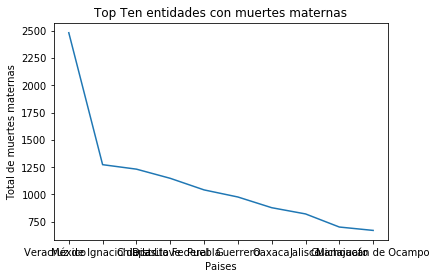

In [139]:
Top_ten = Entidad_Muertes.head(10)
plt.plot(Top_ten)
plt.xlabel("Paises")
plt.ylabel("Total de muertes maternas")
plt.title("Top Ten entidades con muertes maternas")

